In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop([0,1], inplace=True)

In [4]:
df.isnull().sum().sort_values(ascending = False)

Q34_A_Part_9                           19991
Q31_A_Part_9                           19979
Q35_A_Part_4                           19978
Q31_A_Part_12                          19974
Q35_A_Part_6                           19969
                                       ...  
Q4                                       467
Q3                                         0
Q2                                         0
Q1                                         0
Time from Start to Finish (seconds)        0
Length: 355, dtype: int64

In [5]:
for col in df.columns:
    df[col].fillna("Missing",inplace=True)

In [6]:
def univariate_plots(feat,name):
    count = df[feat].value_counts().sort_values(ascending = False)

    # lets visualize the feature distribution in the dataset
    fig = px.pie(count,
                 values=count.values,
                 names=count.index,
                 color_discrete_sequence=orange_black,
                 hole=.1,title= name + " Distribution")
    fig.update_traces(textinfo='percent', pull=0.01)    
    fig.show()

In [7]:
orange_black = ['#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820']

# Setting plot styling.
plt.style.use('fivethirtyeight')

Age Distribution

In [8]:
agedata = df['Q1'].sort_index()
agedata

2        30-34
3        35-39
4        30-34
5        30-34
6        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20035, dtype: object

Text(0.5, 0, 'Age')

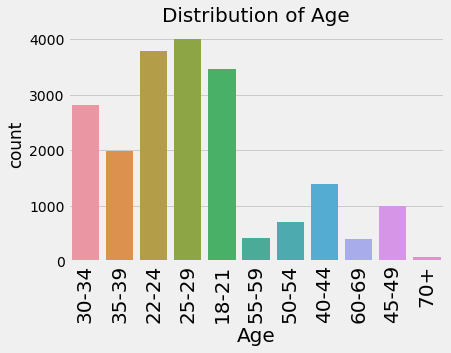

In [9]:
import seaborn as sb
import seaborn as sns
agedata = df['Q1'].sort_index()
x = df['Q1']
sns.countplot( x="Q1", data = df)


plt.title('Distribution of Age',fontsize=20)
plt.xticks(rotation =90, fontsize=20)
plt.xlabel('Age',fontsize=20)

In [10]:
univariate_plots("Q1","Age Wise")

Gender

In [11]:
gender = df['Q2'].value_counts().sort_index()
gender

Man                        15788
Nonbinary                     52
Prefer not to say            263
Prefer to self-describe       54
Woman                       3878
Name: Q2, dtype: int64

Text(0.5, 0, 'Gender')

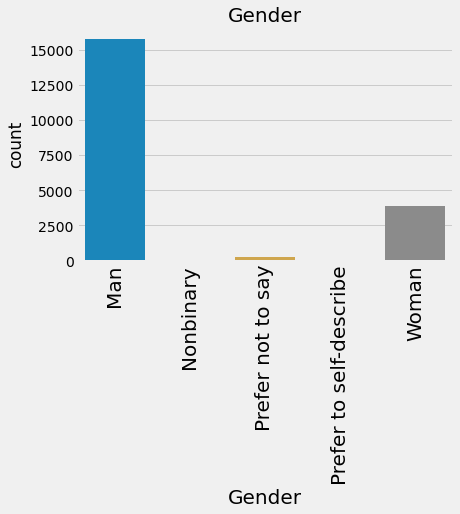

In [12]:
import seaborn as sb
import seaborn as sns
x = df['Q2']
sns.countplot( x='Q2', data = df,order = gender.index)

plt.title('Gender',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Gender',fontsize=20)

In [13]:
univariate_plots("Q2","Gender")

Country

In [14]:
country = df['Q3'].value_counts().sort_index()
country

Argentina                                                134
Australia                                                231
Bangladesh                                               143
Belarus                                                   59
Belgium                                                   60
Brazil                                                   694
Canada                                                   301
Chile                                                     85
China                                                    474
Colombia                                                 176
Egypt                                                    179
France                                                   330
Germany                                                  404
Ghana                                                     52
Greece                                                   111
India                                                   5851
Indonesia               

Education

In [15]:
education = df['Q4'].value_counts().sort_index()
education

Bachelor’s degree                                                    6978
Doctoral degree                                                      2301
I prefer not to answer                                                399
Master’s degree                                                      7859
Missing                                                               467
No formal education past high school                                  240
Professional degree                                                   699
Some college/university study without earning a bachelor’s degree    1092
Name: Q4, dtype: int64

In [16]:
univariate_plots("Q4","Education")

Text(0.5, 0, 'Education')

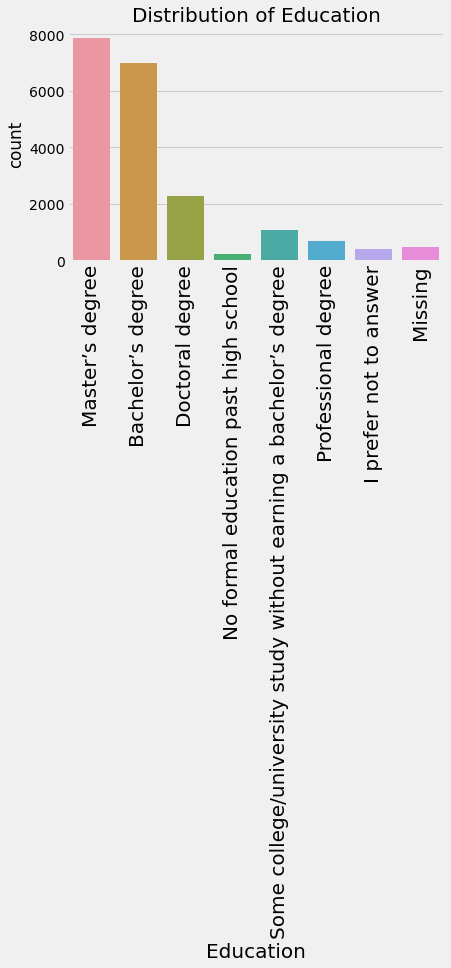

In [17]:
import seaborn as sns
agedata = df['Q4'].sort_index()
x = df['Q4']
sns.countplot( x="Q4", data = df)

plt.title('Distribution of Education',fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.xlabel('Education',fontsize=20)

In [18]:
univariate_plots("Q4","Education Status")

Current Role

In [19]:
role = df['Q5'].value_counts().sort_index()
role

Business Analyst              798
Currently not employed       1652
DBA/Database Engineer         125
Data Analyst                 1475
Data Engineer                 437
Data Scientist               2676
Machine Learning Engineer    1082
Missing                       759
Other                        1737
Product/Project Manager       692
Research Scientist           1174
Software Engineer            1968
Statistician                  290
Student                      5170
Name: Q5, dtype: int64


Programming Language Experience

In [20]:

experience = df['Q6'].value_counts().sort_index()
experience

1-2 years                    4505
10-20 years                  1751
20+ years                    1329
3-5 years                    4546
5-10 years                   2551
< 1 years                    3313
I have never written code    1124
Missing                       916
Name: Q6, dtype: int64

Programming Language

In [21]:
language = df[[i for i in df.columns if 'Q7' in i]]
language_all = pd.Series(dtype='int')
for i in language.columns:
    language_all[language[i].value_counts().index[0]] = language[i].count()

language_all = language_all.sort_values(ascending=True)
language_all

Python     20035
Missing    20035
dtype: int64

Recommended Programming Language

In [22]:
recommended = df['Q8'].value_counts().sort_index()
recommended

Bash             26
C               301
C++             325
Java            167
Javascript       88
Julia           121
MATLAB          195
Missing        2215
None             81
Other           151
Python        14240
R              1259
SQL             849
Swift            17
Name: Q8, dtype: int64

Text(0.5, 1.0, 'Programming Languages used on a Regular Basis')

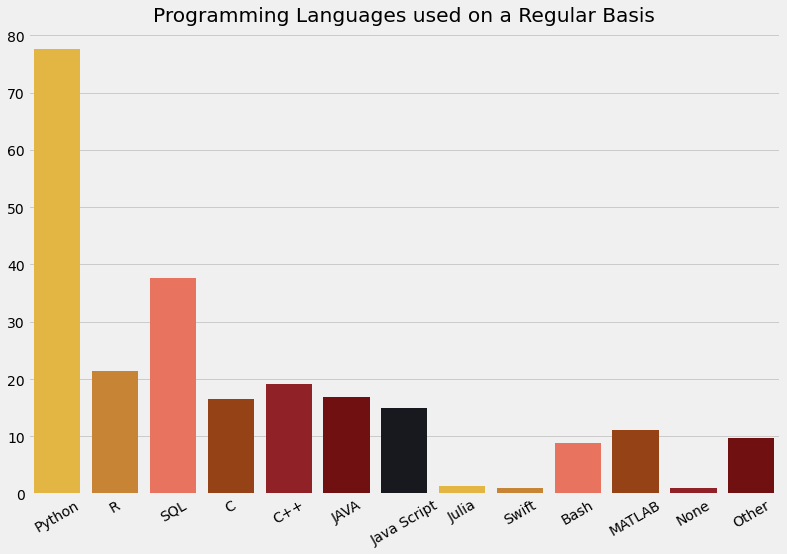

In [23]:
values = []
index  = ["Python","R","SQL","C","C++","JAVA","Java Script","Julia","Swift","Bash","MATLAB","None","Other"]

values.append((len(df[df['Q7_Part_1']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_2']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_3']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_5']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_6']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_7']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_8']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_9']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_11'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_Part_12'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q7_OTHER']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=index,
            y=values,
            palette=orange_black)
plt.xticks(rotation=30)
plt.title('Programming Languages used on a Regular Basis')

Favourite IDE

In [24]:
df_ides = df[[i for i in df.columns if 'Q9' in i]]
df_ides_all = pd.Series(dtype='int')
for i in df_ides.columns:
    df_ides_all[df_ides[i].value_counts().index[0]] = df_ides[i].count()
df_ides_all

Jupyter (JupyterLab, Jupyter Notebooks, etc)     20035
Missing                                          20035
dtype: int64

Text(0.5, 1.0, 'Integrated Development Environment')

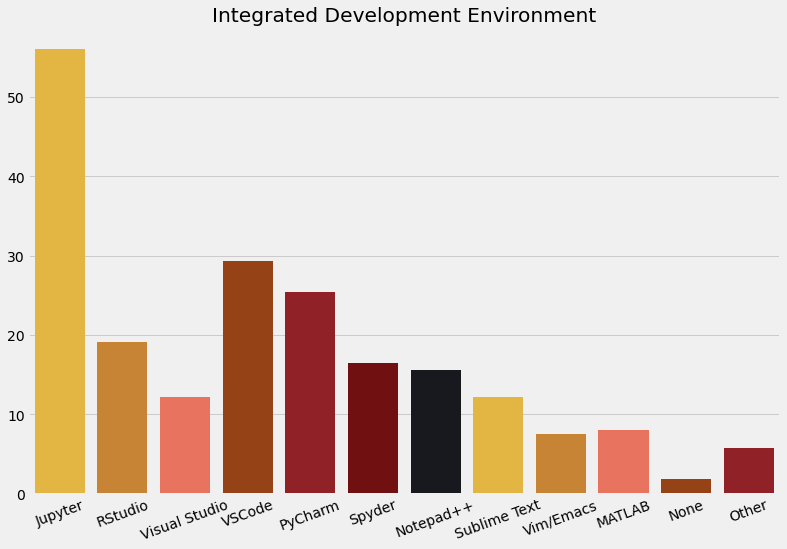

In [25]:
values = []
index  = ["Jupyter","RStudio","Visual Studio","VSCode","PyCharm","Spyder","Notepad++","Sublime Text","Vim/Emacs","MATLAB","None","Other"]

values.append((len(df[df['Q9_Part_1']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_2']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_3']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_5']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_6']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_7']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_8']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_9']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_Part_11'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q9_OTHER']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=index,
            y=values,
            palette=orange_black)
plt.xticks(rotation=20)
plt.title('Integrated Development Environment')


Hosted Notebooks

In [26]:
df_notebooks = df[[i for i in df.columns if 'Q10' in i]]
df_notebooks_all = pd.Series(dtype='int')
for i in df_notebooks.columns:
    df_notebooks_all[df_notebooks[i].value_counts().index[0]] = df_notebooks[i].count()
df_notebooks_all

Missing    20035
dtype: int64

Text(0.5, 1.0, 'Hosted Notebook Products used')

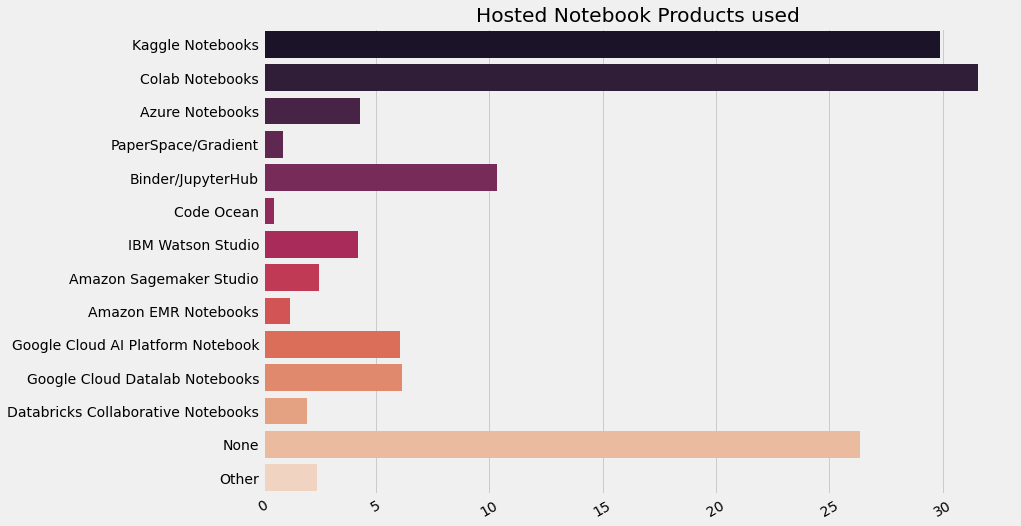

In [27]:
values = []
index  = ["Kaggle Notebooks","Colab Notebooks","Azure Notebooks","PaperSpace/Gradient","Binder/JupyterHub","Code Ocean",
          "IBM Watson Studio","Amazon Sagemaker Studio","Amazon EMR Notebooks","Google Cloud AI Platform Notebook",
          "Google Cloud Datalab Notebooks","Databricks Collaborative Notebooks","None","Other"]

values.append((len(df[df['Q10_Part_1']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_2']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_3']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_5']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_6']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_7']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_8']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_9']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_11'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_12'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_Part_13'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q10_OTHER']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=values,
            y=index,
            palette="rocket")
plt.xticks(rotation=30)
plt.title('Hosted Notebook Products used')

Computing Platform

In [28]:
platform = df['Q11'].value_counts().sort_index()
platform

A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)     2357
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                834
A personal computer or laptop                                          13348
Missing                                                                 3007
None                                                                     292
Other                                                                    197
Name: Q11, dtype: int64

In [29]:
univariate_plots("Q11","Computing Platform Wise")

Hardware

In [30]:
df_hardware = df[[i for i in df.columns if 'Q12' in i]]
df_hardware_all = pd.Series(dtype='int')
for i in df_hardware.columns:
    df_hardware_all[df_hardware[i].value_counts().index[0]] = df_hardware[i].count()
df_hardware_all

Missing    20035
dtype: int64

Text(0.5, 1.0, 'Specialized Hardware Used')

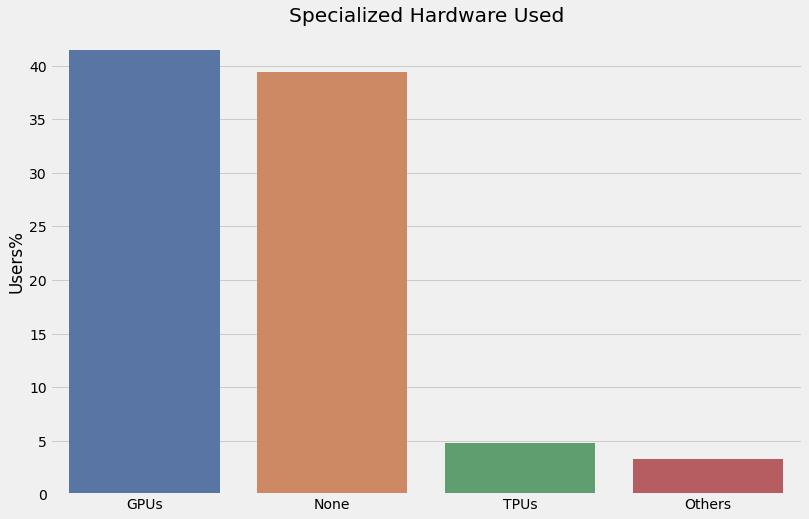

In [31]:
values = []
index  = ['GPUs','None','TPUs','Others']


values.append((len(df[df['Q12_Part_1'] == "GPUs"])/df.shape[0])*100)
values.append((len(df[df['Q12_Part_3'] == "None"])/df.shape[0])*100)
values.append((len(df[df['Q12_Part_2'] == "TPUs"])/df.shape[0])*100)
values.append((len(df[df['Q12_OTHER'] == "Other"])/df.shape[0])*100)

users = pd.DataFrame({"Users%":values})

plt.figure(figsize = (12,8))

sns.barplot(x=index,
            y="Users%",
            data=users,
            palette="deep")
plt.title('Specialized Hardware Used')

TPU Use Rate

In [32]:
tpu = df['Q13'].value_counts().sort_index()
tpu

2-5 times              2111
6-25 times              424
Missing                3256
More than 25 times      272
Never                 12050
Once                   1922
Name: Q13, dtype: int64

In [33]:
univariate_plots("Q13","TPU Use Rate Wise")

Visualization Libraries

In [34]:
df_library = df[[i for i in df.columns if 'Q14' in i]]
df_library_all = pd.Series(dtype='int')
for i in df_library.columns:
    df_library_all[df_library[i].value_counts().index[0]] = df_library[i].count()
df_library_all

 Matplotlib     20035
Missing         20035
dtype: int64

Text(0.5, 1.0, 'Data Visualization Libraries or Tools')

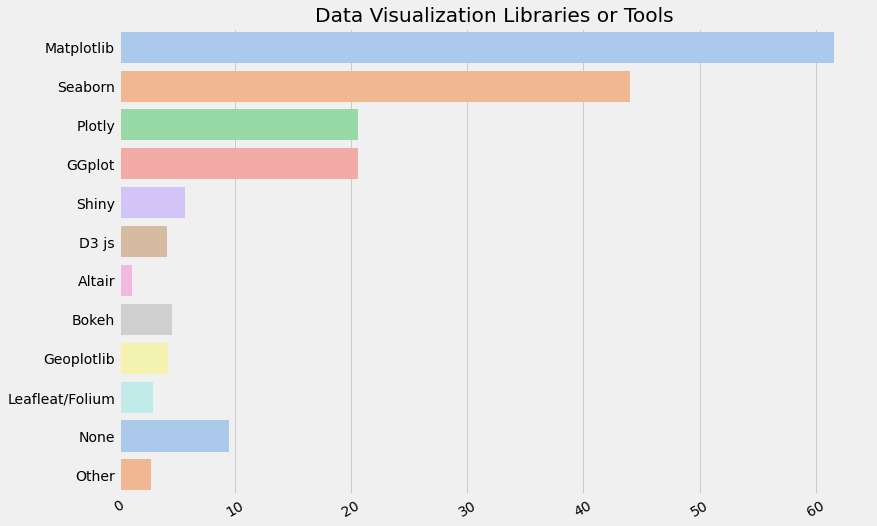

In [35]:
values = []
index  = ["Matplotlib","Seaborn","Plotly","GGplot","Shiny","D3 js","Altair","Bokeh","Geoplotlib","Leafleat/Folium","None","Other"]

values.append((len(df[df['Q14_Part_1']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_2']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_3']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_5']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_6']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_7']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_8']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_9']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_Part_11'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q14_OTHER']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=values,
            y=index,
            palette="pastel")
plt.xticks(rotation=30)
plt.title('Data Visualization Libraries or Tools')

Years of Using Machine learning

In [36]:
df_mlyears = df[[i for i in df.columns if 'Q15' in i]]
df_mlyears_all = pd.Series(dtype='int')
for i in df_mlyears.columns:
    df_mlyears_all[df_mlyears[i].value_counts().index[0]] = df_mlyears[i].count()
df_mlyears

,Q15
2,1-2 years
3,I do not use machine learning methods
4,3-4 years
5,Missing
6,Missing
...,...
20032,Missing
20033,1-2 years
20034,I do not use machine learning methods
20035,1-2 years


In [37]:
univariate_plots("Q15","Year using ML Methods")


Most Used Machine Learning Framework

In [38]:
df_mlframe = df[[i for i in df.columns if 'Q16' in i]]
df_mlframe_all = pd.Series(dtype='int')
for i in df_mlframe.columns:
    df_mlframe_all[df_mlframe[i].value_counts().index[0]] = df_mlframe[i].count()
df_mlframe

,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER
2,Scikit-learn,TensorFlow,Keras,PyTorch,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
3,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Scikit-learn,TensorFlow,Keras,Missing,Missing,Missing,Xgboost,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
5,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
6,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
20033,Scikit-learn,TensorFlow,Keras,PyTorch,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
20034,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
20035,Scikit-learn,TensorFlow,Keras,PyTorch,Missing,Missing,Xgboost,Missing,Missing,Missing,Missing,Missing,Tidymodels,Missing,Missing,Missing


Text(0.5, 1.0, 'Machine Learning Frameworks')

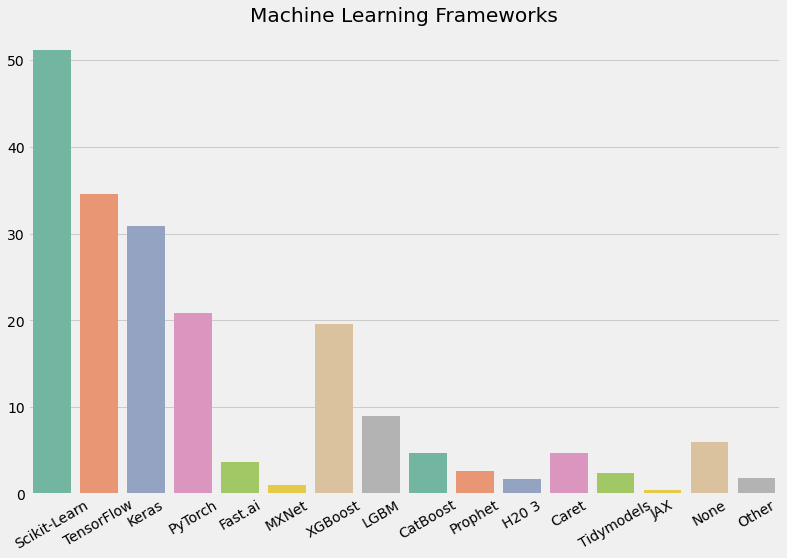

In [39]:
values = []
index  = ["Scikit-Learn","TensorFlow","Keras","PyTorch","Fast.ai","MXNet","XGBoost","LGBM","CatBoost","Prophet","H20 3",
          "Caret","Tidymodels","JAX","None","Other"]

values.append((len(df[df['Q16_Part_1']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_2']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_3']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_4']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_5']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_6']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_7']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_8']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_9']  != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_10'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_11'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_12'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_13'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_14'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_Part_15'] != "Missing"])/df.shape[0])*100)
values.append((len(df[df['Q16_OTHER']   != "Missing"])/df.shape[0])*100)

users = pd.DataFrame({"index":index,"value":values})

plt.figure(figsize = (12,8))
sns.barplot(x=index,
            y=values,
            palette="Set2")
plt.xticks(rotation=30)
plt.title('Machine Learning Frameworks')

Size of the company where you are employed

In [40]:
univariate_plots("Q20","Size Of the Company")